**Item requerido:** Utilizar um exemplo com CNN para detectar classes
  - Utilizar um exemplo pronto do Keras
  - Reduzir a resolução da imagem
  - Montar uma rede neural profunda do zero
  - Verificar resultados e tempo de aprendizagem

Exemplo utilizado como base: [imagens com redes neurais: cachorro ou gato](https://www.kaggle.com/code/brunosoaresdossantos/imagens-com-redes-neurais-cachorro-ou-gato)

## Importando as bibliotecas

In [ ]:
# importando as bibliotecas
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Importando bibliotecas referentes as redes neurais
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import load_img
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Importando outras bibliotecas uteis
from sklearn.model_selection import train_test_split
import os
import random

#importando bibliotecas de métricas
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

## Importando a base de imagens

### Habilitando a API do Kaggle

In [ ]:
!pip install kaggle

import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content'  # Definindo o diretório onde está o arquivo kaggle.json

### Baixando a base

In [ ]:
!kaggle datasets download -d smaranjitghose/corn-or-maize-leaf-disease-dataset

Dataset URL: https://www.kaggle.com/datasets/smaranjitghose/corn-or-maize-leaf-disease-dataset
License(s): copyright-authors
 90% 145M/161M [00:01<00:00, 92.2MB/s]
100% 161M/161M [00:01<00:00, 88.7MB/s]


In [ ]:
!unzip corn-or-maize-leaf-disease-dataset.zip

Archive:  corn-or-maize-leaf-disease-dataset.zip
  inflating: data/Blight/Corn_Blight (1).jpeg  
  inflating: data/Blight/Corn_Blight (1).jpg  
  inflating: data/Blight/Corn_Blight (10).jpg  
  inflating: data/Blight/Corn_Blight (100).jpg  
  inflating: data/Blight/Corn_Blight (1000).JPG  
  inflating: data/Blight/Corn_Blight (1001).JPG  
  inflating: data/Blight/Corn_Blight (1002).JPG  
  inflating: data/Blight/Corn_Blight (1003).JPG  
  inflating: data/Blight/Corn_Blight (1004).JPG  
  inflating: data/Blight/Corn_Blight (1005).JPG  
  inflating: data/Blight/Corn_Blight (1006).JPG  
  inflating: data/Blight/Corn_Blight (1007).JPG  
  inflating: data/Blight/Corn_Blight (1008).JPG  
  inflating: data/Blight/Corn_Blight (1009).JPG  
  inflating: data/Blight/Corn_Blight (101).jpg  
  inflating: data/Blight/Corn_Blight (1010).JPG  
  inflating: data/Blight/Corn_Blight (1011).jpg  
  inflating: data/Blight/Corn_Blight (1012).JPG  
  inflating: data/Blight/Corn_Blight (1013).JPG  
  inflatin

### Criando o DataFrame

In [ ]:
# Diretório onde as imagens estão localizadas
diretorio_principal = '/content/data/'

# Lista para armazenar os caminhos dos arquivos de imagem e suas classes
data = {'caminho': [], 'classe': []}

# Percorre os subdiretórios
for classe in os.listdir(diretorio_principal):
    classe_path = os.path.join(diretorio_principal, classe)
    if os.path.isdir(classe_path):
        # Percorre os arquivos de imagem dentro de cada subdiretório
        for imagem in os.listdir(classe_path):
            imagem_path = os.path.join(classe_path, imagem)
            # Adiciona o caminho da imagem e sua classe à lista
            data['caminho'].append(imagem_path)
            data['classe'].append(classe)

# Cria o DataFrame
df = pd.DataFrame(data)

# Codifica as classes como vetores one-hot
df = pd.get_dummies(df, columns=['classe'])

# Exibe as primeiras linhas do DataFrame
print(df.head())

                                             caminho  classe_Blight  \
0  /content/data/Gray_Leaf_Spot/Corn_Gray_Spot (4...          False   
1  /content/data/Gray_Leaf_Spot/Corn_Gray_Spot (4...          False   
2  /content/data/Gray_Leaf_Spot/Corn_Gray_Spot (3...          False   
3  /content/data/Gray_Leaf_Spot/Corn_Gray_Spot (5...          False   
4  /content/data/Gray_Leaf_Spot/Corn_Gray_Spot (2...          False   

   classe_Common_Rust  classe_Gray_Leaf_Spot  classe_Healthy  
0               False                   True           False  
1               False                   True           False  
2               False                   True           False  
3               False                   True           False  
4               False                   True           False  


## Construíndo o modelo

In [ ]:
FAST_RUN = False
# O modelo precisa de imagens de tamanho iguais - então reduzindo imagens para 180x180
IMAGE_WIDTH=180
IMAGE_HEIGHT=180
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=3

In [ ]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Dense(4, activation='softmax')) # 4 pois temos quatro tipos de doenças

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 178, 178, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 89, 89, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 89, 89, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 87, 87, 64)        2

## Criando Callback

Ou seja, seta a condição de parada para o programa

In [ ]:
earlystop = EarlyStopping(patience=10)

learning_rate_reduction = ReduceLROnPlateau(
    monitor='val_accuracy',
    patience=2,
    verbose=1,
    factor=0.5,
    min_lr=0.00001
)

callbacks = [earlystop, learning_rate_reduction]

## Dividindo em treino e validação

In [ ]:
train_df, validate_df = train_test_split(df, test_size=0.20, random_state=42)
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)

### Verificando quantidade de doenças nos dados de treinamento

In [ ]:
# Obtenha uma lista de todas as colunas de classe
classe_cols = [col for col in train_df.columns if col.startswith('classe_')]

# Conte o número de ocorrências de cada classe
class_counts = train_df[classe_cols].sum()

# Exiba os resultados
print(class_counts)

classe_Blight             921
classe_Common_Rust       1064
classe_Gray_Leaf_Spot     433
classe_Healthy            932
dtype: int64


### Verificando quantidade de doenças nos dados de teste

In [ ]:
# Conte o número de ocorrências de cada classe
class_counts = validate_df[classe_cols].sum()

# Exiba os resultados
print(class_counts)

classe_Blight            225
classe_Common_Rust       242
classe_Gray_Leaf_Spot    141
classe_Healthy           230
dtype: int64


In [ ]:
total_train = train_df.shape[0]
total_validate = validate_df.shape[0]
batch_size=16

## Data Argumentation

Aumentando o banco por meio de modificações na imagens como: rotação, brilho, zoom, espeslhamento, etc.

In [ ]:
train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.2,
    height_shift_range=0.2
)

train_generator = train_datagen.flow_from_dataframe(
    train_df,
    x_col='caminho',
    y_col=classe_cols,
    target_size=IMAGE_SIZE,
    class_mode='raw',
    batch_size=batch_size
)

Found 3350 validated image filenames.


In [ ]:
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validate_df,
    x_col='caminho',
    y_col=classe_cols,
    target_size=IMAGE_SIZE,
    class_mode='raw',
    batch_size=batch_size
)

Found 838 validated image filenames.


Found 1 validated image filenames.


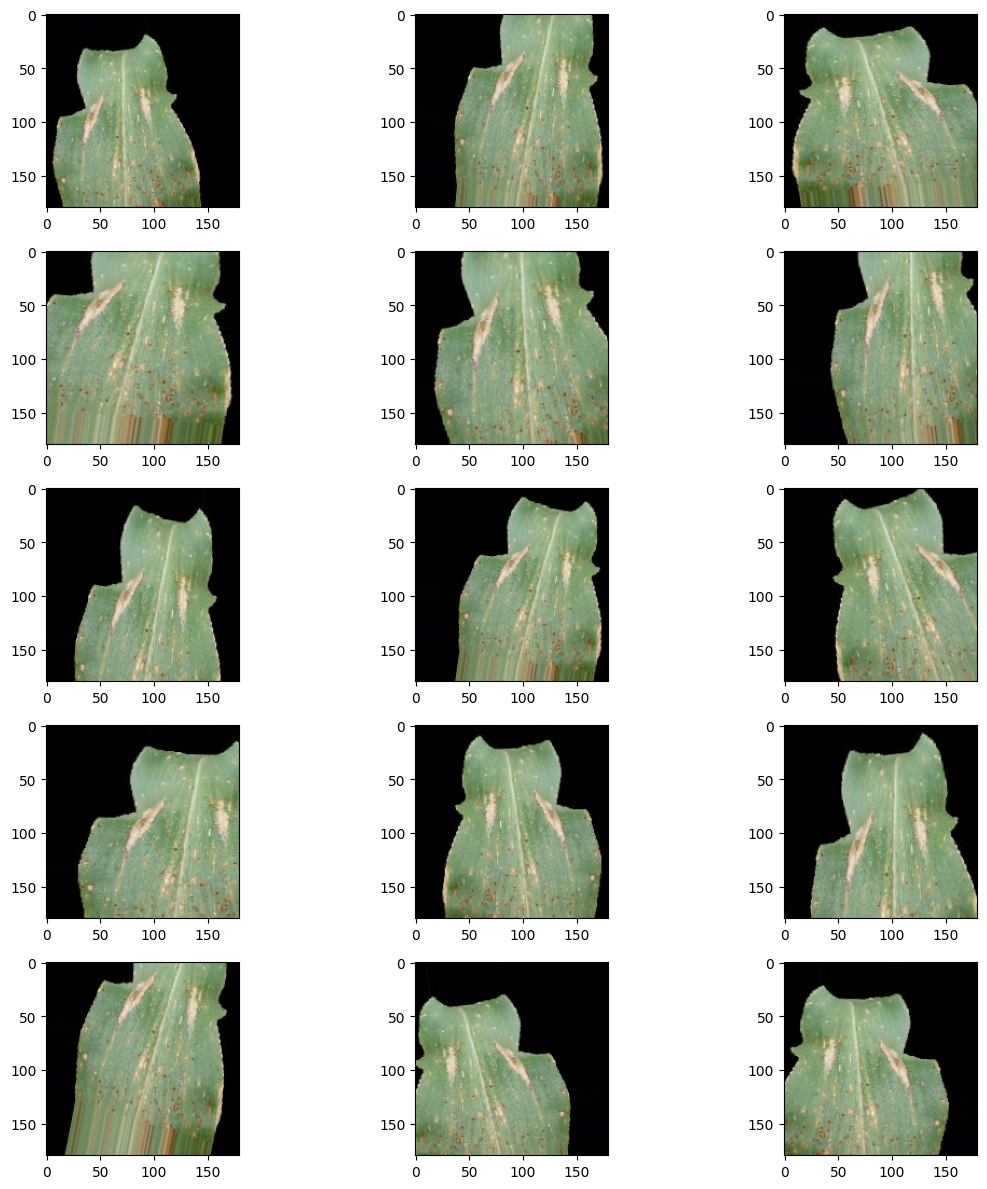

In [ ]:
example_df = train_df.sample(n=1).reset_index(drop=True)
example_generator = train_datagen.flow_from_dataframe(
    example_df,
    x_col='caminho',
    y_col=classe_cols,
    target_size=IMAGE_SIZE,
    class_mode='raw'
)

plt.figure(figsize=(12, 12))
for i in range(0, 15):
    plt.subplot(5, 3, i+1)
    for X_batch, Y_batch in example_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

## Treinando o modelo

In [ ]:
epochs= 3 if FAST_RUN else 25
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size,
    callbacks=callbacks
)

Epoch 1/25
209/209 [==============================] - 38s 179ms/step - loss: 0.4227 - accuracy: 0.8527 - val_loss: 0.3287 - val_accuracy: 0.8834 - lr: 6.2500e-05
Epoch 2/25
209/209 [==============================] - 41s 194ms/step - loss: 0.3734 - accuracy: 0.8599 - val_loss: 0.3293 - val_accuracy: 0.8750 - lr: 6.2500e-05
Epoch 3/25
209/209 [==============================] - 38s 180ms/step - loss: 0.3575 - accuracy: 0.8581 - val_loss: 0.2947 - val_accuracy: 0.8894 - lr: 6.2500e-05
Epoch 4/25
209/209 [==============================] - 38s 182ms/step - loss: 0.3361 - accuracy: 0.8683 - val_loss: 0.2909 - val_accuracy: 0.8906 - lr: 6.2500e-05
Epoch 5/25
209/209 [==============================] - 37s 179ms/step - loss: 0.3287 - accuracy: 0.8695 - val_loss: 0.2914 - val_accuracy: 0.8978 - lr: 6.2500e-05
Epoch 6/25
209/209 [==============================] - 37s 179ms/step - loss: 0.3005 - accuracy: 0.8785 - val_loss: 0.3108 - val_accuracy: 0.8966 - lr: 6.2500e-05
Epoch 7/25
209/209 [========

### Salvando o modelo treinado

In [ ]:
model.save_weights("model.h5")

## Avaliando o Treinamento

### Por meio de gráficos

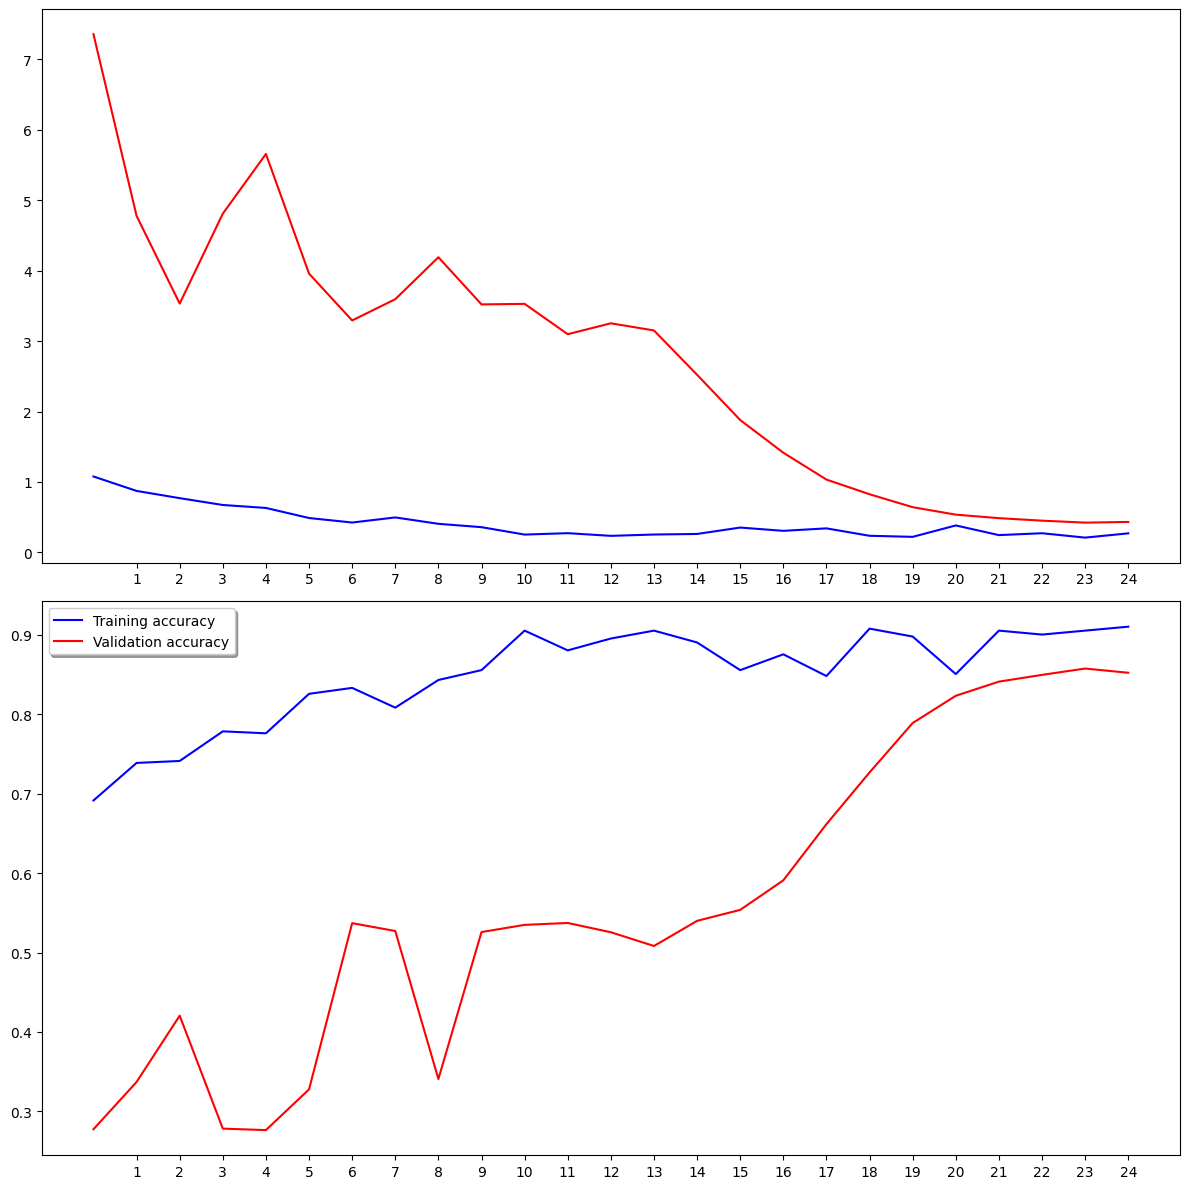

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.plot(history.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, epochs, 1))

ax2.plot(history.history['accuracy'], color='b', label="Training accuracy")
ax2.plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, epochs, 1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

### Por meio dos paramêtros de acerto

In [ ]:
loss, accuracy = model.evaluate_generator(validation_generator, total_validate//batch_size, workers=12)
print("Test: accuracy = %f  ;  loss = %f " % (accuracy, loss))

<ipython-input-19-5bf9ded073bc>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  loss, accuracy = model.evaluate_generator(validation_generator, total_validate//batch_size, workers=12)


Test: accuracy = 0.852394  ;  loss = 0.432298 


### Por meio da matriz de confusão

236/236 [==============================] - 10s 40ms/step


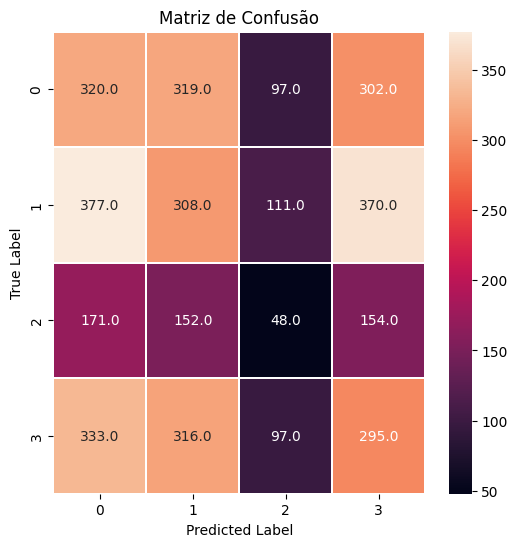

In [ ]:
# Obtenha uma lista de todas as colunas de classe
classe_cols = [col for col in validate_df.columns if col.startswith('classe_')]

# Converta os vetores one-hot de volta em rótulos de classe
Y_val = np.argmax(validate_df[classe_cols].values, axis=-1)

# Faça as previsões
y_pred = model.predict(validation_generator, steps=np.ceil(total_validate/batch_size))

# Converta as previsões de volta em rótulos de classe
y_pred = np.argmax(y_pred, axis=-1)

# Crie um mapa de índices para nomes de classe
index_to_class = {i: c for i, c in enumerate(classe_cols)}

# Substitua os índices pelos nomes das classes
Y_val = [index_to_class[i] for i in Y_val]
y_pred = [index_to_class[i] for i in y_pred]

# Calcule a matriz de confusão
confusion_mtx = confusion_matrix(Y_val, y_pred)

# Plotando a matriz
f,ax = plt.subplots(figsize=(6, 6))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01, fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Matriz de Confusão")
plt.show()

### Por meio do classification_report

In [ ]:
report = classification_report(Y_val, y_pred, target_names=classe_cols)

print(report)

                       precision    recall  f1-score   support

        classe_Blight       0.27      0.31      0.29      1038
   classe_Common_Rust       0.28      0.26      0.27      1166
classe_Gray_Leaf_Spot       0.14      0.09      0.11       525
       classe_Healthy       0.26      0.28      0.27      1041

             accuracy                           0.26      3770
            macro avg       0.24      0.24      0.24      3770
         weighted avg       0.25      0.26      0.25      3770

